In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


from glob import glob

torch.set_default_device('cpu')
torch.set_default_tensor_type('torch.FloatTensor')



/home/jovyan/miniconda3/envs/astralora/lib/python3.10/site-packages/torch/__init__.py:1236: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at /pytorch/torch/csrc/tensor/python_tensor.cpp:434.)
  _C._set_default_tensor_type(t)


In [2]:
layer_name = '_orig_mod.transformer.h.11.mlp.c_proj'

# Digital

In [3]:

model_path = "/home/jovyan/chertkov/astralora/nanogpt_fineweb/result/digital/model.pt"

model = torch.load(model_path, map_location="cpu")
digital_fc_layer = model[f'{layer_name}.weight']
digital_fc_layer.shape









torch.Size([1536, 6144])

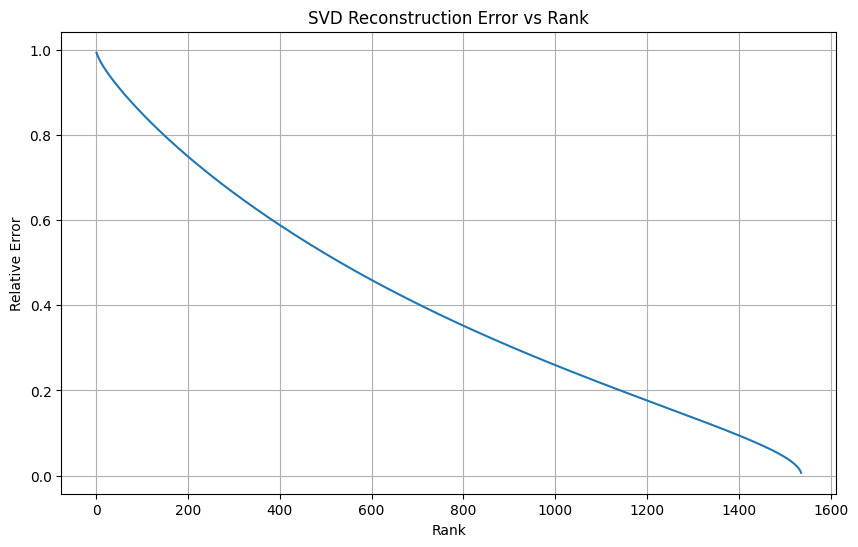

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Compute full SVD
U, S, Vh = torch.linalg.svd(digital_fc_layer)

# Calculate reconstruction errors for different ranks
ranks_digital = range(1, 1536)
errors_digital = []

for r in ranks_digital:
    # Reconstruct matrix with rank r
    reconstructed = U[:,:r] @ torch.diag(S[:r]) @ Vh[:r,:]
    # Compute relative error
    error = torch.norm(digital_fc_layer - reconstructed) / torch.norm(digital_fc_layer)
    errors_digital.append(error.item())

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(ranks_digital, errors_digital)
plt.xlabel('Rank')
plt.ylabel('Relative Error')
plt.title('SVD Reconstruction Error vs Rank')
plt.grid(True)
plt.show()


# rank_10

In [5]:

model_path = "/home/jovyan/chertkov/astralora/nanogpt_fineweb/result/bb_one_rank10/model.pt"

model = torch.load(model_path, map_location="cpu")
bb_fc_layer = model[f'{layer_name}.A']

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Compute full SVD
U, S, Vh = torch.linalg.svd(bb_fc_layer)

# Calculate reconstruction errors for different ranks
ranks_bb = range(1, 1536)
errors_bb = []

for r in ranks_bb:
    # Reconstruct matrix with rank r
    reconstructed = U[:,:r] @ torch.diag(S[:r]) @ Vh[:r,:]
    # Compute relative error
    error = torch.norm(bb_fc_layer - reconstructed) / torch.norm(bb_fc_layer)
    errors_bb.append(error.item())



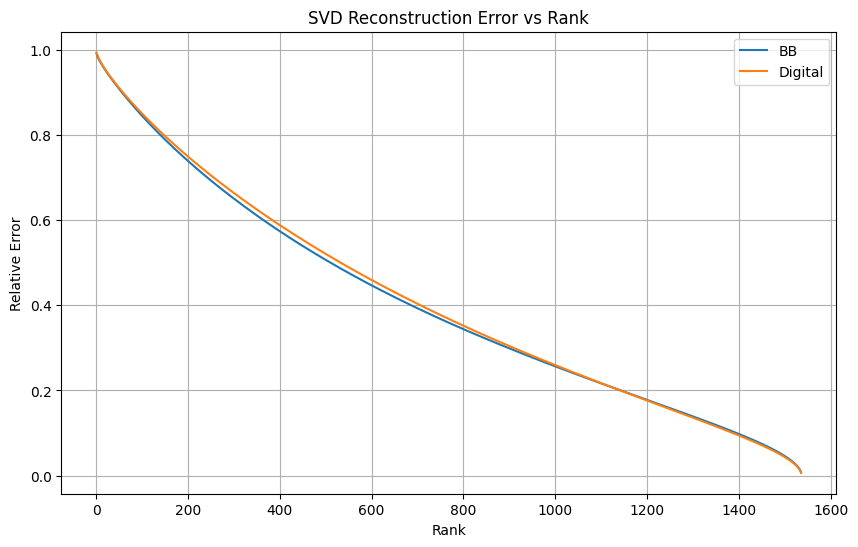

In [7]:

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(ranks_bb, errors_bb, label='BB')
plt.plot(ranks_digital, errors_digital, label='Digital')
plt.xlabel('Rank')
plt.ylabel('Relative Error')
plt.title('SVD Reconstruction Error vs Rank')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Calculate relative difference between digital and bb matrices
diff = torch.norm(digital_fc_layer - bb_fc_layer) / torch.norm(digital_fc_layer)
print(f"Relative difference between digital and bb matrices: {diff:.4f}")


Relative difference between digital and bb matrices: 1.2189
